## Deep NN(5-layers) with Dropout : MNIST - Keras

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils

import matplotlib.pyplot as plt

### Step 1. Data -  target class : 10

In [18]:
num_classes = 10

# Step 1. Data Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Step 2. Deep NN Model (5-layer NN) with Dropout

In [19]:
# Step 2. Model
dropout_prob = 0.3
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(dropout_prob))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout_prob))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout_prob))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout_prob))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout_prob))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)              

### Step 3. Loss, Optimizer and Metric

In [20]:
# Step 3. Loss,Optimizer, Metric
model.compile (optimizer= 'adam', 
                loss='categorical_crossentropy', metrics = ['accuracy'])

### Step 4. Train the model

In [21]:
# Step 4. Train the model
history=model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=2,
                  validation_split=0.2)

Epoch 1/15
480/480 - 2s - loss: 0.4309 - accuracy: 0.8648 - val_loss: 0.1372 - val_accuracy: 0.9592
Epoch 2/15
480/480 - 1s - loss: 0.1885 - accuracy: 0.9465 - val_loss: 0.1164 - val_accuracy: 0.9664
Epoch 3/15
480/480 - 2s - loss: 0.1451 - accuracy: 0.9596 - val_loss: 0.1046 - val_accuracy: 0.9689
Epoch 4/15
480/480 - 2s - loss: 0.1204 - accuracy: 0.9663 - val_loss: 0.1183 - val_accuracy: 0.9658
Epoch 5/15
480/480 - 2s - loss: 0.1062 - accuracy: 0.9698 - val_loss: 0.0925 - val_accuracy: 0.9737
Epoch 6/15
480/480 - 2s - loss: 0.0964 - accuracy: 0.9729 - val_loss: 0.0978 - val_accuracy: 0.9737
Epoch 7/15
480/480 - 1s - loss: 0.0821 - accuracy: 0.9771 - val_loss: 0.0954 - val_accuracy: 0.9751
Epoch 8/15
480/480 - 2s - loss: 0.0813 - accuracy: 0.9770 - val_loss: 0.0872 - val_accuracy: 0.9772
Epoch 9/15
480/480 - 1s - loss: 0.0775 - accuracy: 0.9784 - val_loss: 0.0932 - val_accuracy: 0.9770
Epoch 10/15
480/480 - 2s - loss: 0.0736 - accuracy: 0.9793 - val_loss: 0.0995 - val_accuracy: 0.9781

### Step 5. Test the Model

In [22]:
# Step 5. Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss = ', test_loss, 'test_acc = ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9812
test_loss =  0.09022537618875504 test_acc =  0.9811999797821045


### Plot the Training/Validation loss

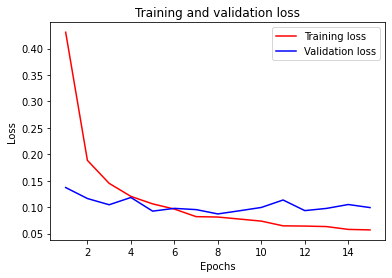

In [23]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Validation Accuracy

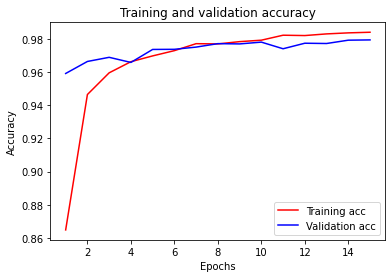

In [24]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()